In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

In [41]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 0')

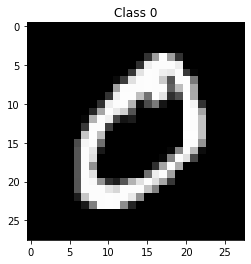

In [42]:
plt.imshow(X_train[1], cmap='gray')
plt.title('Class '+ str(y_train[1]))

In [45]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [51]:
y_train[2]

4

In [50]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [53]:
Y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [54]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Polling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
                                                      

In [56]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [12]:
gen = ImageDataGenerator(rotation_range=8,
                         width_shift_range=0.08,
                         shear_range=0.3,
                         height_shift_range=0.08, 
                         zoom_range=0.08,
                        #  horizontal_flip=True, # horizontal flip
                         brightness_range=[0.2,1.2])

test_gen = ImageDataGenerator()

In [13]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [14]:
# model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))

model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


937/937 [==============================] - 150s 159ms/step - loss: 0.2017 - accuracy: 0.9371 - val_loss: 0.0345 - val_accuracy: 0.9885
Epoch 2/5
937/937 [==============================] - 148s 158ms/step - loss: 0.0645 - accuracy: 0.9803 - val_loss: 0.0377 - val_accuracy: 0.9870
Epoch 3/5
937/937 [==============================] - 163s 174ms/step - loss: 0.0478 - accuracy: 0.9855 - val_loss: 0.0197 - val_accuracy: 0.9934
Epoch 4/5
937/937 [==============================] - 148s 158ms/step - loss: 0.0389 - accuracy: 0.9881 - val_loss: 0.0259 - val_accuracy: 0.9916
Epoch 5/5
937/937 [==============================] - 147s 157ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0197 - val_accuracy: 0.9931


In [15]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 6s 20ms/step - loss: 0.0196 - accuracy: 0.9931

Test accuracy:  0.9930999875068665


In [19]:
predictions = model.predict(X_test)
predictions=np.argmax(predictions,axis=1)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.head(50)

,Actual,Predictions
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


**Prediction on a single Image**

In [59]:
img=X_test[30]

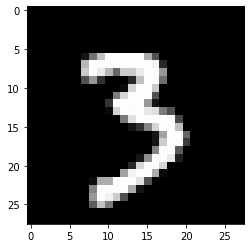

In [60]:
plt.imshow(img[:,:,0], cmap='gray')

In [62]:
"Actual Class:",y_test[30]

('Actual Class:', 3)

In [63]:
import cv2

img = cv2.resize(img,(28,28))
img = np.reshape(img,[1,28,28,1])

In [64]:
classes = model.predict(img)
print(classes)

[[0.09688588 0.10070805 0.10148893 0.10867412 0.10128999 0.09205295
  0.10040767 0.09798407 0.10547031 0.095038  ]]


In [65]:
print("Predicted Class Label: ", np.argmax(classes,axis=1))

Predicted Class Label:  [3]
